In [1]:
import rebound
%matplotlib inline
import matplotlib.pyplot as plt
import observations
import state
import mcmc
import driver
import numpy as np

In [2]:
true_state = state.State(planets= [{'a':0.3500, 'm':0.001965, 'h':0.2, 'k':-0.05}])
#arg2 is N data points, arg 3 is the error, arg 4 is the variance in error, arg5 is time
obs = driver.create_obs(true_state, 150, 2.5e-4, 3e-5, 4.7)

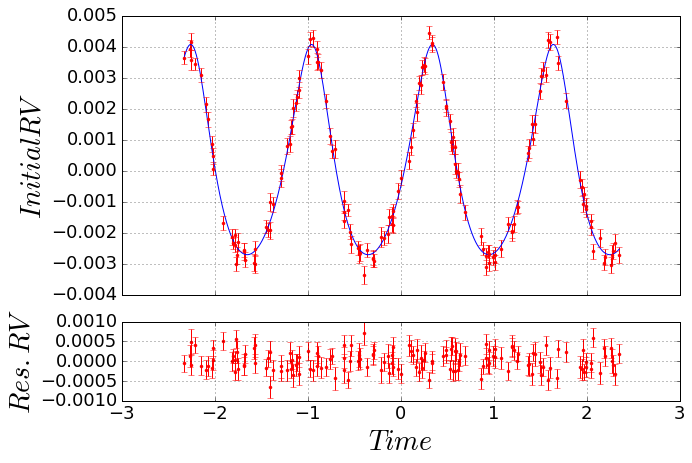

In [3]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.plot(*true_state.get_rv_plotting(obs), color="blue")
plt.errorbar(obs.t, obs.rv, yerr=obs.err, fmt='.r')
ax.set_xticklabels([])
ax.set_ylabel("$Initial RV$", fontsize=28)
ax.tick_params(axis='both', labelsize=18)
plt.grid()
frame2=fig.add_axes([0.125, -0.17, 0.775, 0.22])
plt.tick_params(axis='both', labelsize=18)  
frame2.set_ylabel("$Res. RV$", fontsize=28)
frame2.set_xlabel("$Time$", fontsize=28)      
plt.errorbar(obs.t, true_state.get_rv(obs.t)-obs.rv, yerr=obs.err, fmt='.r')
plt.grid()

In [4]:
Niter, delt, L = 200, 0.0001, 1

In [5]:
mcmc, chain, chainlogp = driver.run_hmc(Niter, true_state, obs, delt, L)

Acceptance rate: 51.00%


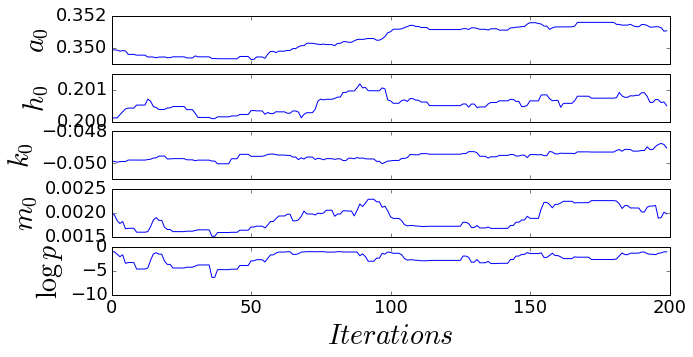

In [6]:
fig = plt.figure(figsize=(10,5))
for i in range(mcmc.state.Nvars):
    ax = plt.subplot(mcmc.state.Nvars+1,1,1+i)
    ax.set_ylabel(mcmc.state.get_keys()[i])
    ax.tick_params(axis='x', labelbottom='off')
    ax.yaxis.label.set_size(28)
    ax.tick_params(axis='both', labelsize=18)
    ax.locator_params(axis='y', nbins=3)
    ax.plot(chain[:,i])
ax = plt.subplot(mcmc.state.Nvars+1,1,mcmc.state.Nvars+1)
ax.set_ylabel("$\log \, p$")
ax.set_xlabel("$Iterations$")
ax.yaxis.label.set_size(28)
ax.xaxis.label.set_size(28)
ax.tick_params(axis='both', labelsize=18)
ax.locator_params(axis='y', nbins=3)
ax.plot(chainlogp)